In [1]:
from compas.datastructures import Mesh
from compas.datastructures import subdivision as sd
from compas_plotters import MeshPlotter

In [11]:
from utilities import export_obj_by_attribute

In [12]:
import mysubdivision as msd

In [13]:
import random

In [2]:
mesh = Mesh()
a = mesh.add_vertex()
b = mesh.add_vertex(x=1)
c = mesh.add_vertex(x=1, y=1)
d = mesh.add_vertex(y=1)
f = mesh.add_face([a, b, c, d])

In [3]:
def plot(m):
    plotter = MeshPlotter(m)
    plotter.draw_edges()
    plotter.draw_faces()
    plotter.show()

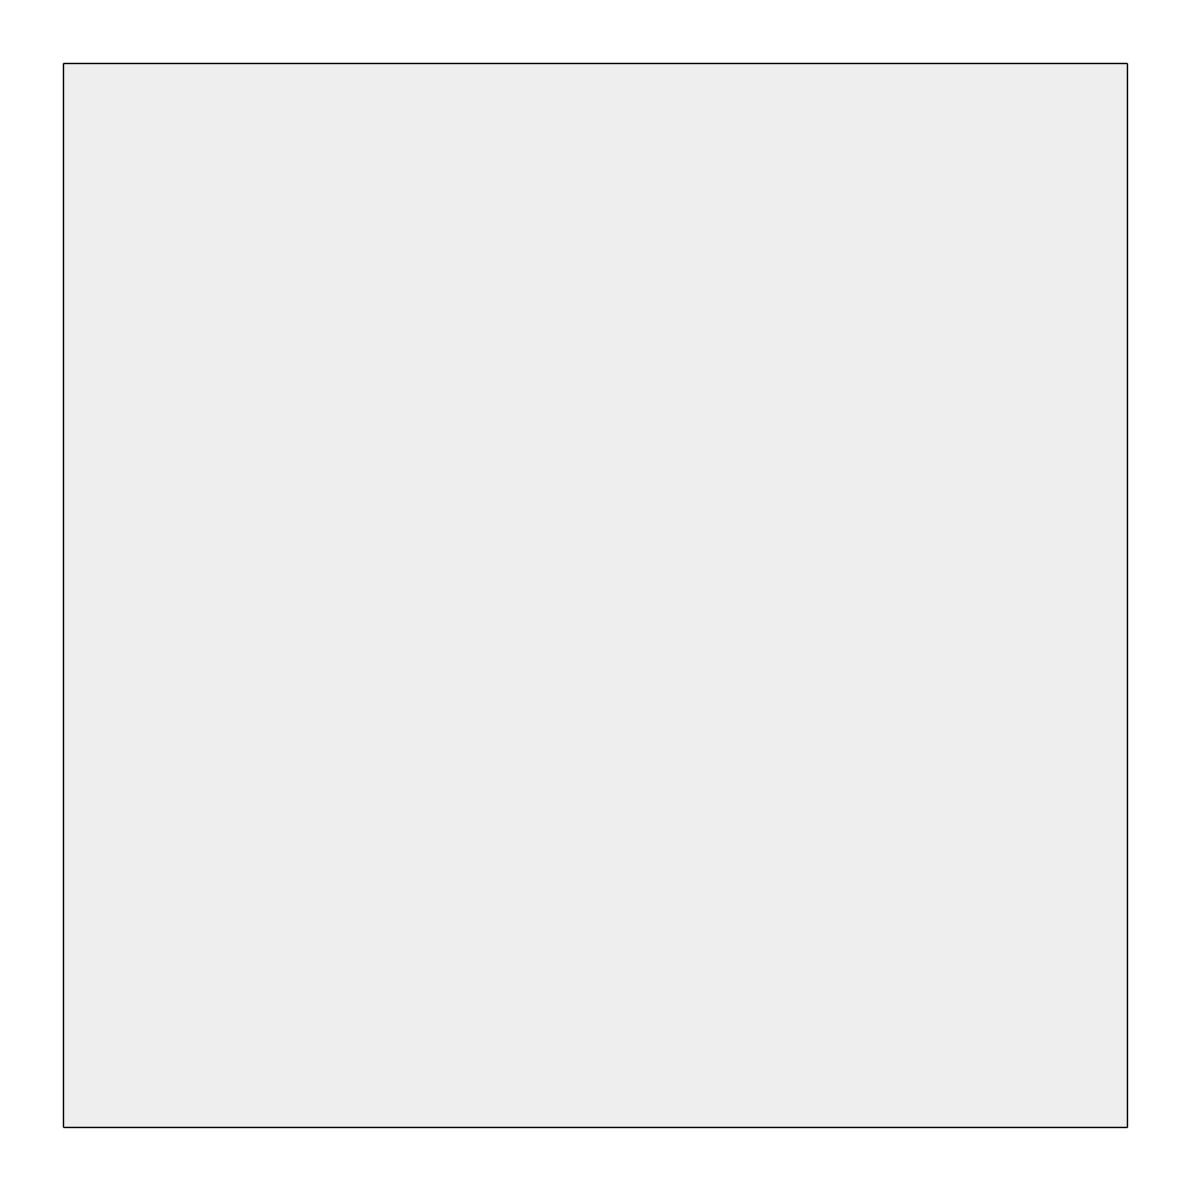

In [4]:
plot(mesh)

In [5]:
mesh = sd.mesh_subdivide_corner(mesh)
mesh = sd.mesh_subdivide_quad(mesh)

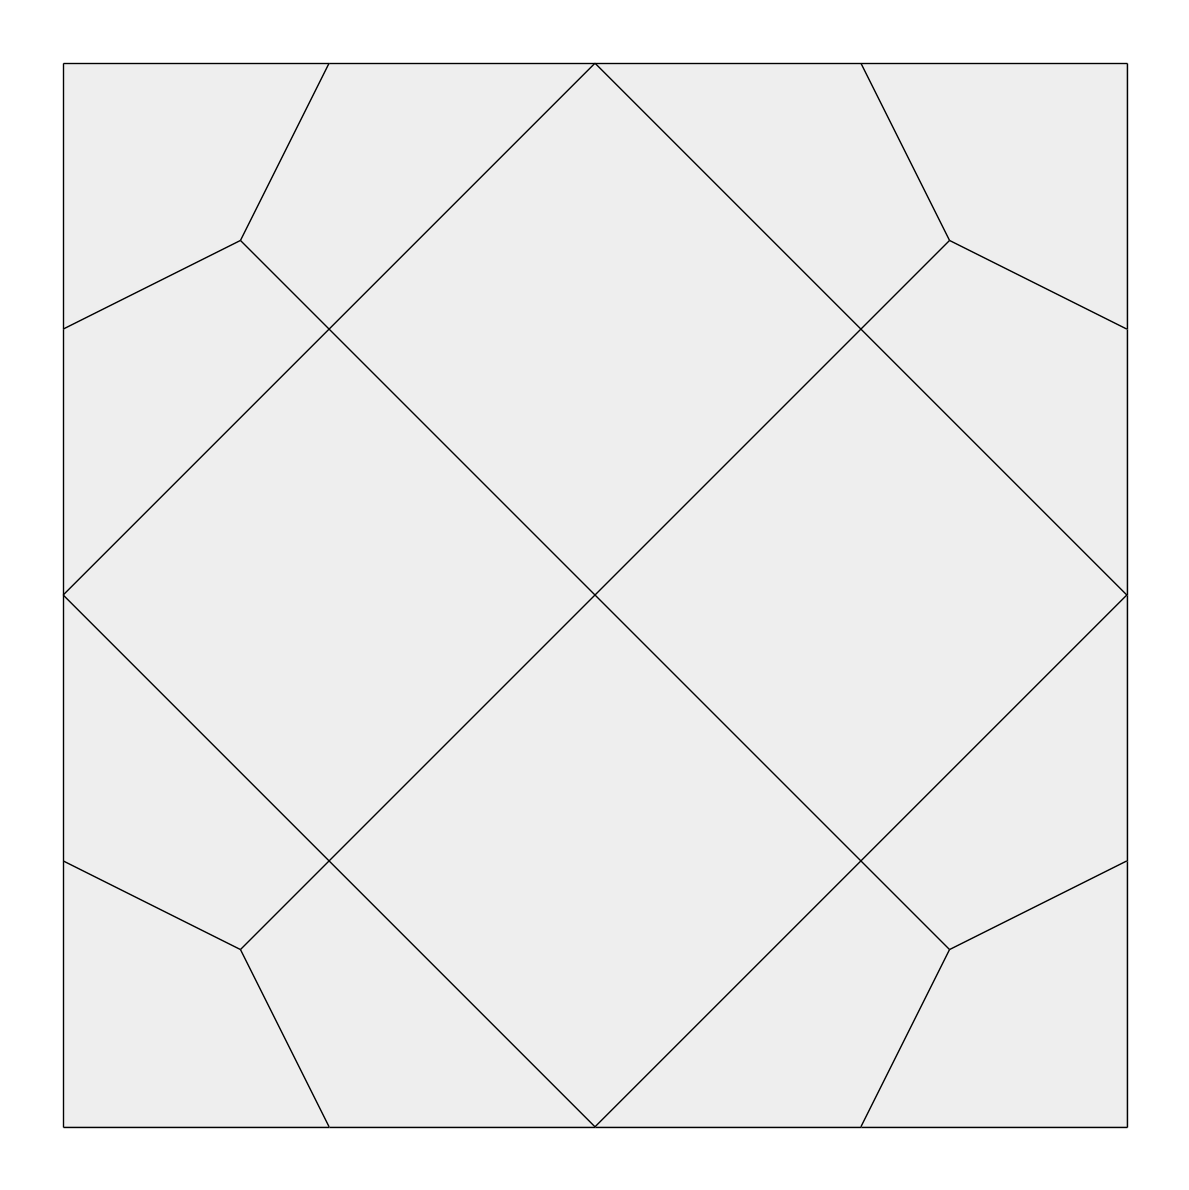

In [6]:
plot(mesh)

In [26]:
fkeys = list(mesh.faces())
for fk in fkeys:
    new_keys = msd.taper_face(mesh, fk, height=0, ratio=0.3)
    mesh.set_faces_attribute(new_keys[:-1], 'ftype', 'circulation')
    mesh.set_face_attribute(new_keys[-1], 'ftype', 'construction')

In [29]:
export_obj_by_attribute('city2.obj', mesh, 'ftype')

In [7]:
def subdivide_by_ftype(mesh):
    fkeys = list(mesh.faces())
    for fk in fkeys:
        ftype = mesh.get_face_attribute(fk, 'ftype')
        #print(ftype)
        if ftype=='plot':
            new_keys = msd.taper_face(mesh, fk, height=0, ratio=0.3)
            mesh.set_faces_attribute(new_keys[:-1], 'ftype', 'circulation')
            mesh.set_face_attribute(new_keys[-1], 'ftype', 'construction')
        elif ftype=='circulation':
            # style the streets
            pass
        elif ftype=='construction':
            if random.random()<0.2:
                # make a park
                new_keys = msd.pyramid_face(mesh, fk, height=0.1)
                mesh.set_faces_attribute(new_keys, 'ftype', 'park')
            else:
                # make a building
                num = random.randint(5,10)
                temp_fk = fk
                for i in range(num):
                    r = random.random() * 0.6 - 0.3
                    new_keys = msd.taper_face(mesh, temp_fk, height=0.1, ratio=r, keep_original=True)
                    mesh.set_faces_attribute(new_keys[:-1], 'ftype', 'facade')
                    mesh.set_face_attribute(temp_fk, 'ftype', 'floor')
                    temp_fk = new_keys[-1]
                mesh.set_face_attribute(temp_fk, 'ftype', 'roof')
        elif ftype=='park':
            # style the pyramids
            pass
        elif ftype=='roof':
            # add a fancy roof
            pass
        elif ftype=='facade':
            # make a facade
            fvs = mesh.face_vertices(fk)
            facade_length = mesh.edge_length(fvs[0],fvs[1])
            num_subdivisions = int(facade_length/0.02)
            if num_subdivisions>1:
                new_keys = msd.segment_face(mesh, fk, num=num_subdivisions)
                mesh.set_faces_attribute(new_keys, 'ftype', 'panel')
            else:
                mesh.set_face_attribute(fk, 'ftype', 'panel')
        elif ftype=='panel':
            # details on the facade
            if random.random()<0.5:
                # make a solid pyramit
                new_keys = msd.pyramid_face(mesh, fk, height=0.01)
                mesh.set_faces_attribute(new_keys, 'ftype', 'solid')
            else:
                # make a window
                new_keys = msd.taper_face(mesh, fk, height=0.01, ratio=0.1)
                mesh.set_faces_attribute(new_keys[:-1], 'ftype', 'frame')
                mesh.set_face_attribute(new_keys[-1], 'ftype', 'glass')
        else:
            pass

In [35]:
from utils import whiteboard as wb

# new mesh, new method

In [8]:
mesh = Mesh()
a = mesh.add_vertex()
b = mesh.add_vertex(x=1)
c = mesh.add_vertex(x=1, y=1)
d = mesh.add_vertex(y=1)
f = mesh.add_face([a, b, c, d])

In [9]:
mesh = sd.mesh_subdivide_tri(mesh)
mesh = sd.mesh_subdivide_quad(mesh)

In [14]:
fkeys = list(mesh.faces())
for fk in fkeys:
    new_keys = msd.segment_face(mesh, fk, num=2, start_index=0)
    mesh.set_faces_attribute(new_keys, 'ftype', 'plot')

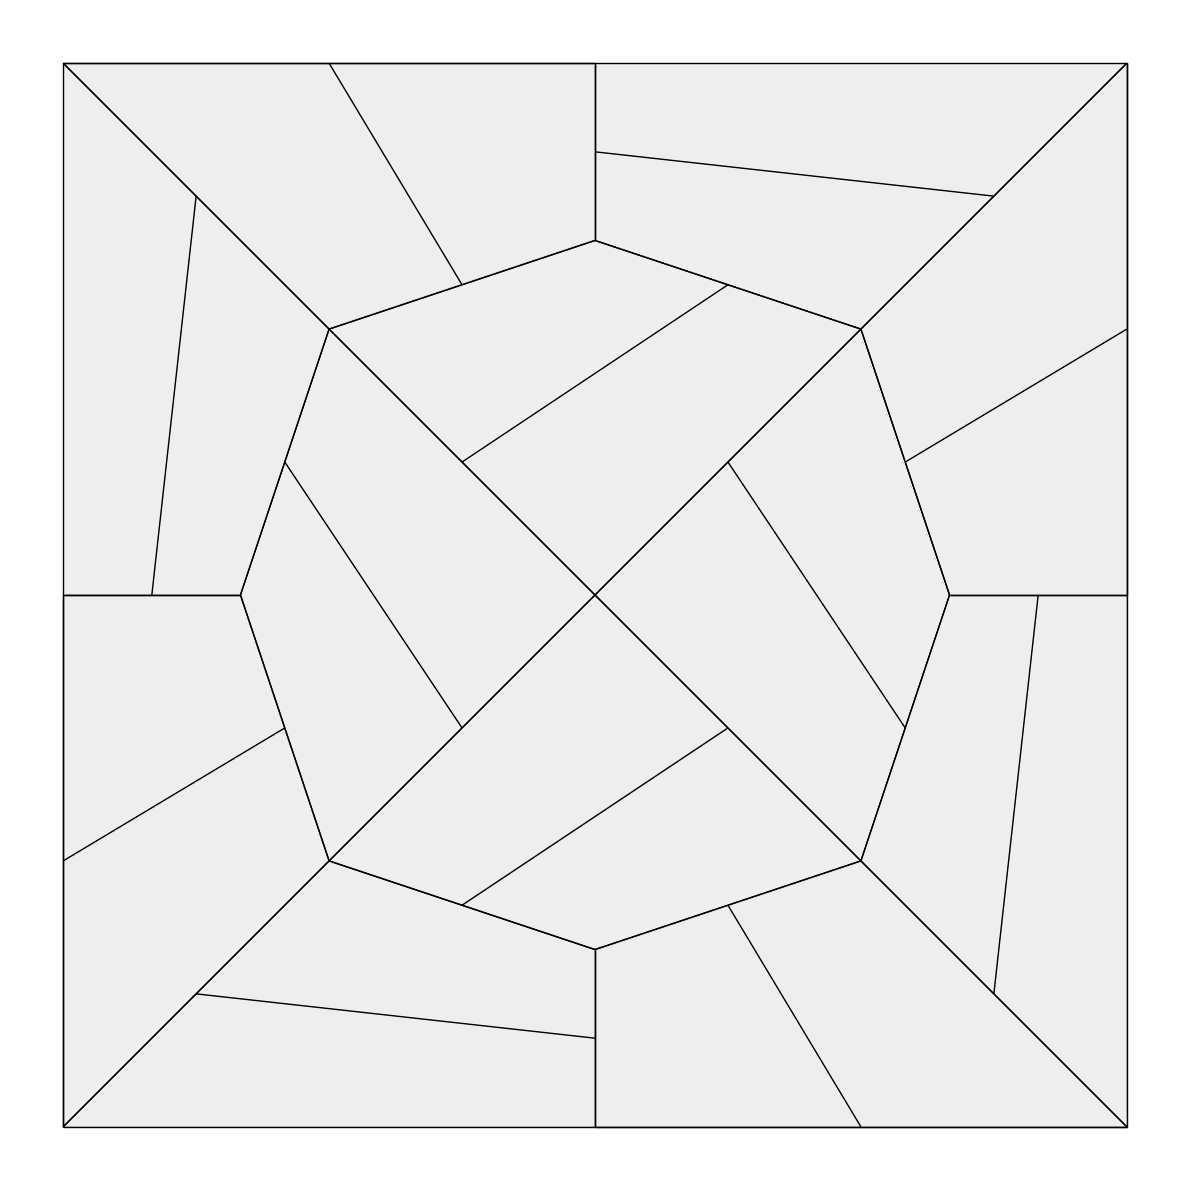

In [50]:
plot(mesh)

In [15]:
m1 = mesh.copy()

In [16]:
subdivide_by_ftype(m1)

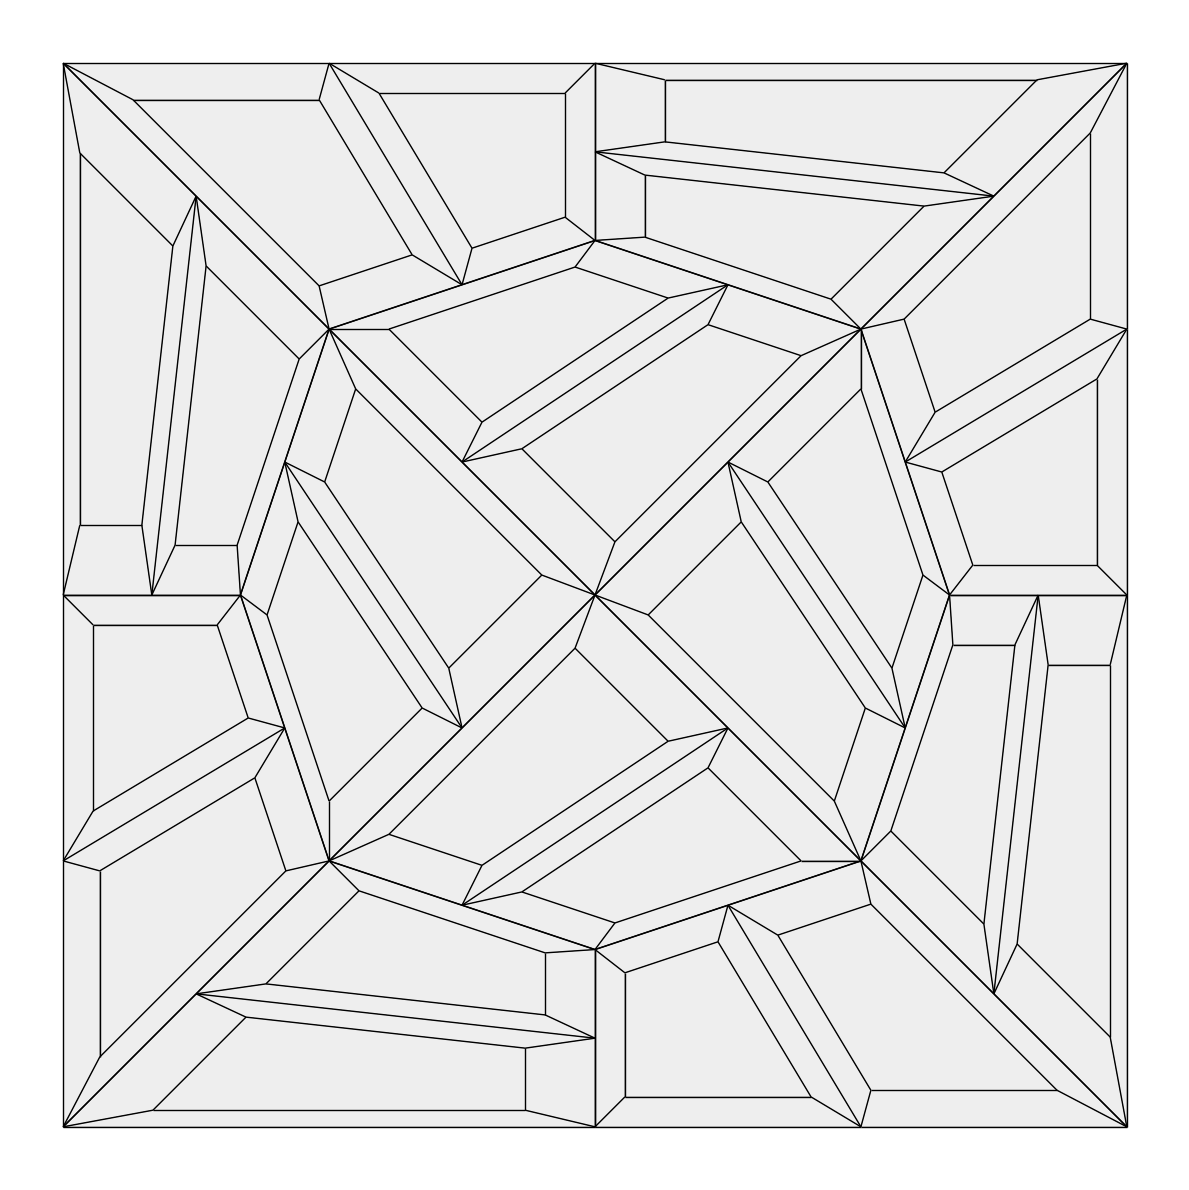

In [17]:
plot(m1)

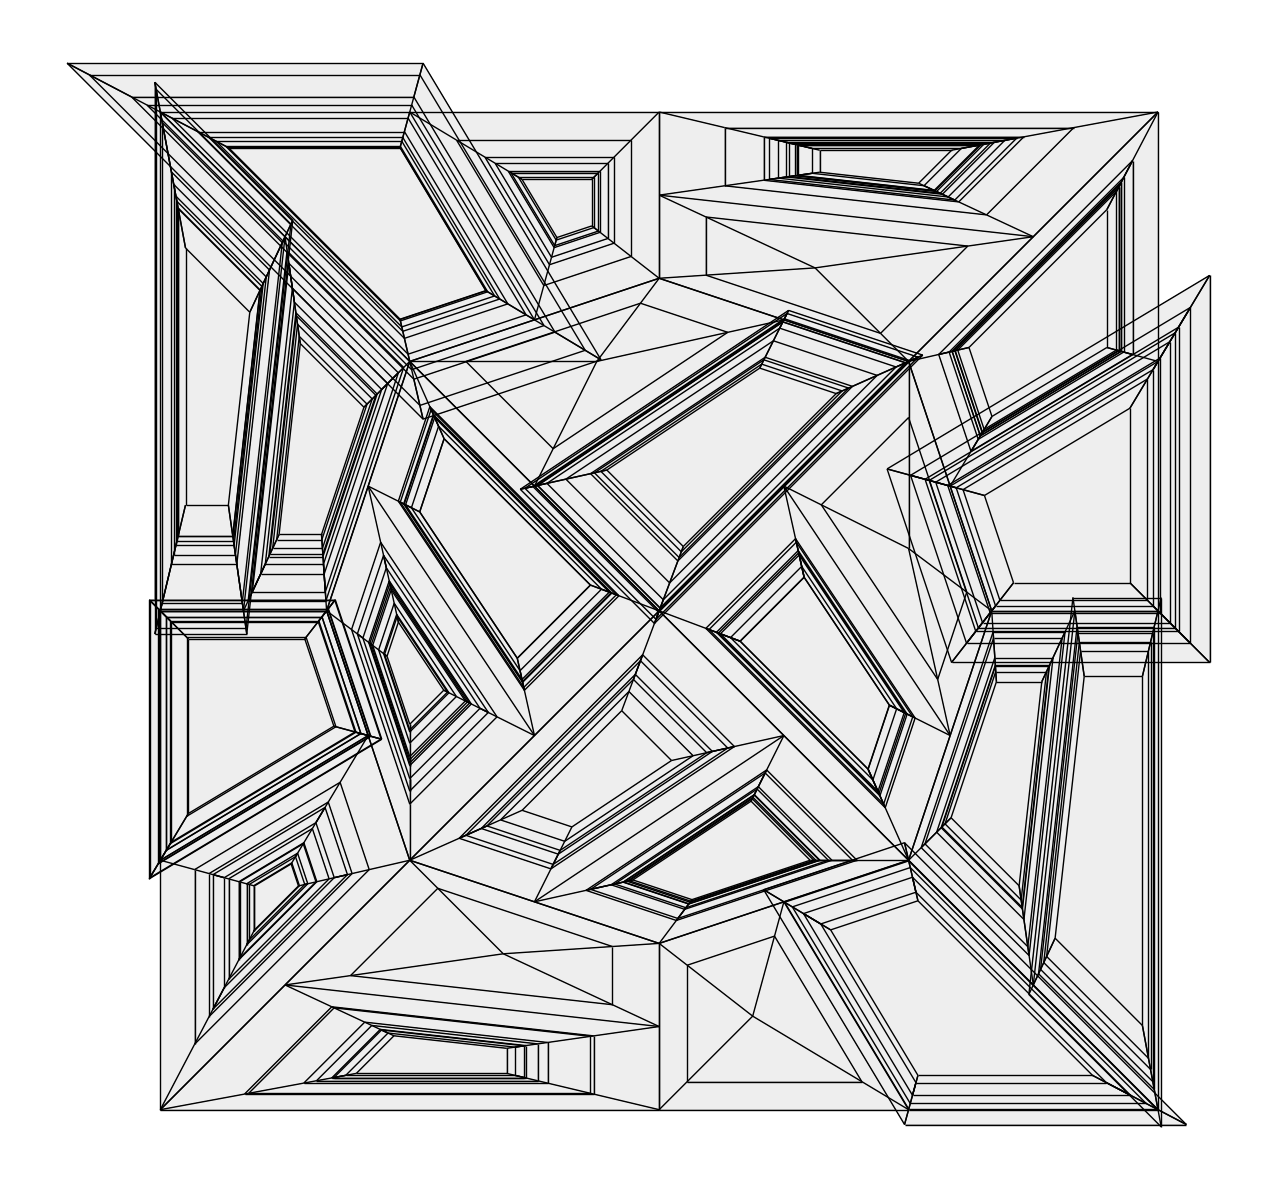

In [18]:
m2 = m1.copy()
subdivide_by_ftype(m2)
plot(m2)

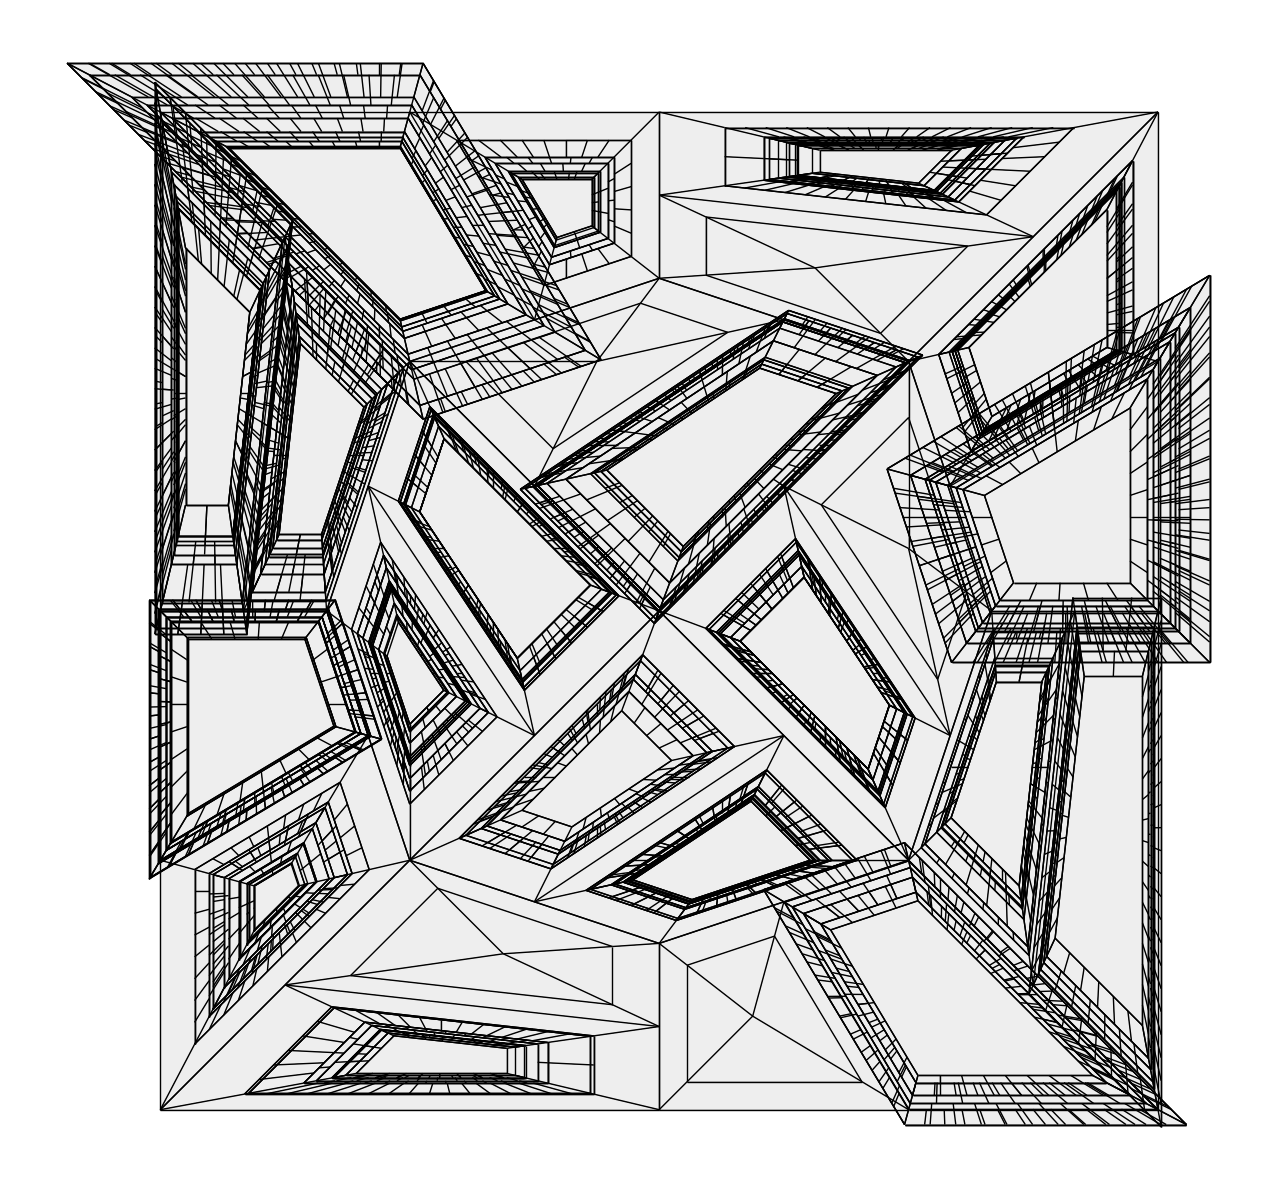

In [19]:
m3 = m2.copy()
subdivide_by_ftype(m3)
plot(m3)

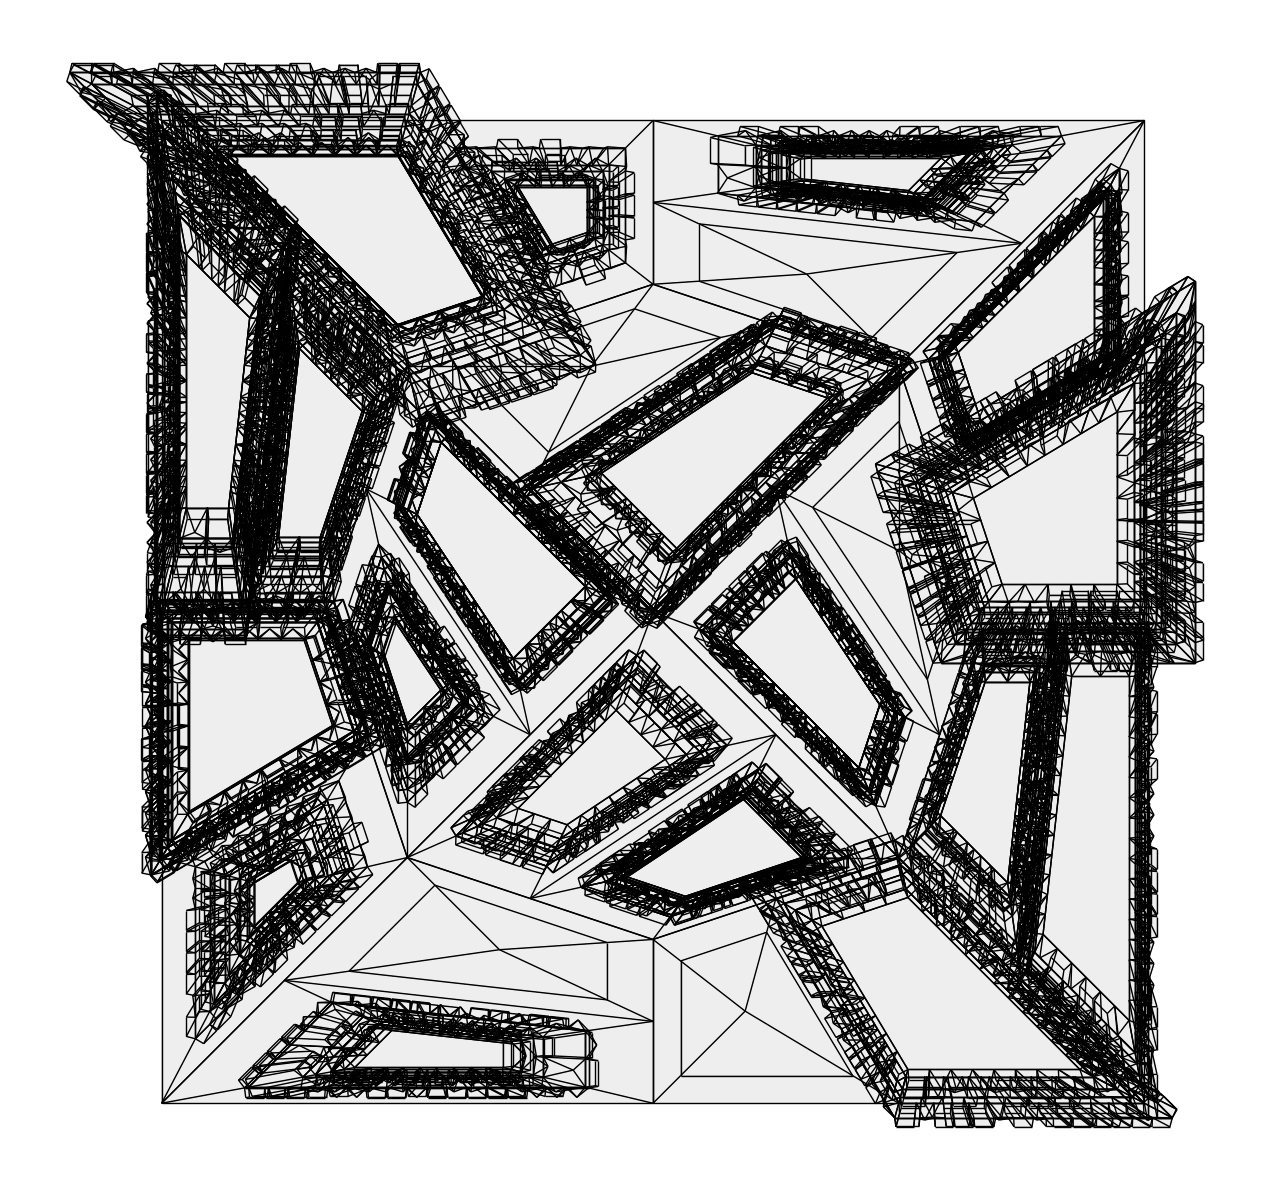

In [20]:
m4 = m3.copy()
subdivide_by_ftype(m4)
plot(m4)

In [21]:
export_obj_by_attribute('city4.obj', m4, 'ftype')